Import relevant libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
from scipy import stats

Importing the necessary dataset, in this case the dataset concerned with Country Benin.

In [7]:
url='https://raw.githubusercontent.com/Esmael-Mohammed/tenx-Week0/refs/heads/main/notebooks/data/benin-malanville.csv'

In [8]:
data_frame=pd.read_csv(url)

In [9]:
# Understand the shape of the distribution.
data_frame.shape

(525600, 19)

In [10]:
# Overview of the varbiables
data_frame.head

<bound method NDFrame.head of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        W

In [11]:
# View of the data types of each column.
data_frame.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [12]:
# A general description of the dataset.
data_frame.describe

<bound method NDFrame.describe of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

     

# Data preparation and cleaning stage

In [13]:
# Subsetting the columns that i consider irrelevant to my analysis.
# Also re-assign the data_frame variable

df = data_frame[['Timestamp', 'GHI', 'DNI', 'DHI',
            'ModA', 'ModB', 
            'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev','Cleaning','WD',
            #'WDstdev', 'BP', 'Comments',
            'Precipitation','TModA', 'TModB',]].copy()

In [14]:
# Checking the number of coulmns included.
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'Cleaning', 'WD', 'Precipitation', 'TModA',
       'TModB'],
      dtype='object')

In [15]:
# overview of the data types.
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
Cleaning           int64
WD               float64
Precipitation    float64
TModA            float64
TModB            float64
dtype: object

In [16]:
# The time stamp shouldn't be an object so i am going to convert it to a datetime coulmn.
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

One of the checks to be done in the stage of data preparation and cleanign 
is a check for missing values. In the next line of code i am going to check for missing values.

In [17]:
# look for missing values.
df.isna().sum()
# All our metrics have no missing values.

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
Cleaning         0
WD               0
Precipitation    0
TModA            0
TModB            0
dtype: int64

Another check to be done in the stage of data preparation and cleaning is a check for duplicated values. In the next line of code i am going to check for the existence of duplicated values.

In [18]:
# Look for duplicated values.
df.loc[df.duplicated()]
# None of our values are duplicated.

Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, Cleaning, WD, Precipitation, TModA, TModB]
Index: []

## Descriptive statistics
First we are going to present a summary statistics.

In [19]:
# Summary statistics
df.describe()

Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%         1.600000       4.500000       4.300000      28.000000   
75%       216.300000     463.700000     447.900000      32.300000   
max       759.200000    1342.300000    1342.300000      43.800000   
std       158.691074     326.894859     316.536515       5.924297   

                  RH             WS         WSgust        WSstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean       54.487969       2.121113       2.809195       0.473390   
min         2.100000       0.000000       0.000000       0.000000   
25%        28.800000       1.000000       1.300000       0.400000   
50%        55.100000       1.900000       2.600000       0.500000   
75%        80.100000       3.100000       4.100000       0.600000   
max       100.000000      19.500000      26.600000       4.200000   
std        28.073069       1.603466       2.029120       0.273395   

            Cleaning             WD  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        0.000923     153.435172       0.001905      35.246026   
min         0.000000       0.000000       0.000000       9.000000   
25%         0.000000      59.000000       0.000000      24.200000   
50%         0.000000     181.000000       0.000000      30.000000   
75%         0.000000     235.100000       0.000000      46.900000   
max         1.000000     360.000000       2.500000      81.000000   
std         0.030363     102.332842       0.037115      14.807258   

               TModB  
count  525600.000000  
mean       32.471736  
min         8.100000  
25%        23.600000  
50%        28.900000  
75%        41.500000  
max        72.500000  
std        12.348743

After having a brief overview of the descriptive statistics we check for the existence of outliers. It can be implemented using two ways(IQR method and the Z-score method). I have chosen the Z-score method for the sake of convenience and due to the short deadline.

In [20]:
from scipy.stats import zscore  # Import the zscore function
# Ensure columns except 'Timestamp' are numeric
benin_df_numeric = df.drop('Timestamp', axis=1).apply(pd.to_numeric, errors='coerce')

# Set the Z-score threshold for identifying outliers
threshold = 3

# Iterate over each column in the DataFrame
for column in benin_df_numeric.columns:
    # Calculate Z-scores for the column
    z_scores = zscore(benin_df_numeric[column], nan_policy='omit')

    # Identify outliers where Z-scores are greater than the threshold
    outliers = np.abs(z_scores) > threshold
    
    # Calculate the median of the non-outlier values in the column
    column_median = benin_df_numeric.loc[~outliers, column].median()

    # Replace outliers with the column median
    benin_df_numeric.loc[outliers, column] = column_median

    print(f"Number of outliers in {column}: {outliers.sum()}")

# Update the original DataFrame with the modified values
df.update(benin_df_numeric)

# Recheck if there are any remaining outliers (optional step)
remaining_outliers = (np.abs(zscore(benin_df_numeric, nan_policy='omit')) > threshold).any(axis=1)
print(f"Number of remaining outliers after replacement: {remaining_outliers.sum()}")

Number of outliers in GHI: 89
Number of outliers in DNI: 0
Number of outliers in DHI: 3738
Number of outliers in ModA: 27
Number of outliers in ModB: 63
Number of outliers in Tamb: 0
Number of outliers in RH: 0
Number of outliers in WS: 3109
Number of outliers in WSgust: 3500
Number of outliers in WSstdev: 5653
Number of outliers in Cleaning: 485
Number of outliers in WD: 0
Number of outliers in Precipitation: 1402
Number of outliers in TModA: 10
Number of outliers in TModB: 98
Number of remaining outliers after replacement: 6064


After the first attempt there are some outliers still left 
in some columns so in the next line of code we try to remove these remaining outliers.

In [21]:
# Selected columns for outlier removal
selected_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WD']

# Ensure columns except 'Timestamp' are numeric
benin_df_numeric = df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Set the Z-score threshold for identifying outliers
threshold = 3

# Iterate over each selected column in the DataFrame
for column in selected_columns:
    # Calculate Z-scores for the column
    z_scores = zscore(benin_df_numeric[column], nan_policy='omit')

    # Identify outliers where Z-scores are greater than the threshold
    outliers = np.abs(z_scores) > threshold
    
    # Calculate the median of the non-outlier values in the column
    column_median = benin_df_numeric.loc[~outliers, column].median()

    # Replace outliers with the column median
    benin_df_numeric.loc[outliers, column] = column_median

    print(f"Number of outliers in {column}: {outliers.sum()}")

# Update the original DataFrame with the modified values
df.update(benin_df_numeric)

# Recheck if there are any remaining outliers (optional step)
remaining_outliers = (np.abs(zscore(benin_df_numeric, nan_policy='omit')) > threshold).any(axis=1)
print(f"Number of remaining outliers after replacement: {remaining_outliers.sum()}")


Number of outliers in GHI: 1
Number of outliers in DNI: 0
Number of outliers in DHI: 1932
Number of outliers in ModA: 0
Number of outliers in ModB: 0
Number of outliers in WD: 0
Number of remaining outliers after replacement: 1030


In the next line of code we are going to change on the values after removing the outliers.

In [22]:
df.describe()

Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.340468     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     482.900000     314.200000   
max              2022-08-09 00:00:00    1232.000000     952.300000   
std                              NaN     330.865639     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      108.768126     236.524528     228.737160      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%         0.500000       4.500000       4.300000      28.000000   
75%       207.700000     463.600000     447.600000      32.300000   
max       569.600000    1215.000000    1177.000000      43.800000   
std       150.385064     326.815176     316.357415       5.924297   

                  RH             WS         WSgust        WSstdev  Cleaning  \
count  525600.000000  525600.000000  525600.000000  525600.000000  525600.0   
mean       54.487969       2.082432       2.753556       0.462676       0.0   
min         2.100000       0.000000       0.000000       0.000000       0.0   
25%        28.800000       1.000000       1.300000       0.400000       0.0   
50%        55.100000       1.900000       2.400000       0.500000       0.0   
75%        80.100000       3.000000       3.900000       0.600000       0.0   
max       100.000000       6.900000       8.700000       1.200000       0.0   
std        28.073069       1.521898       1.913075       0.249952       0.0   

                  WD  Precipitation          TModA          TModB  
count  525600.000000  525600.000000  525600.000000  525600.000000  
mean      153.435172       0.000454      35.245072      32.463977  
min         0.000000       0.000000       9.000000       8.100000  
25%        59.000000       0.000000      24.200000      23.600000  
50%       181.000000       0.000000      30.000000      28.900000  
75%       235.100000       0.000000      46.900000      41.500000  
max       360.000000       0.100000      79.600000      69.500000  
std       102.332842       0.006724      14.805982      12.337904

The above summary statistics give a thorough rundown of all the different environmental and meteorological characteristics that have been observed in Benin over time. The following are the main trends that should be noted:


#### Temporal Aspects: 
High-frequency measurements (probably hourly or daily) are indicated by the 525,600 observations per parameter in the data, which covers the period August 2021–August 2022. This makes it possible to analyze the data's temporal and seasonal patterns.
#### Sunlight Irradiance and Radiation: 
With GHI and DNI being the predominant components, the mean values for Global Horizontal Irradiance (GHI), Direct Normal Irradiance (DNI), and Diffuse Horizontal Irradiance (DHI) indicate that Benin experiences quite high levels of solar radiation. The fluctuation in the availability of solar resources is shown by the large spread between the minimum and greatest values.
#### Temperature and Humidity: 
A tropical climate is indicated by the mean ambient temperature (Tamb), which is approximately 28°C with a range of 11°C to 43.8°C. With a broad range from 2.1% to 100%, the relative humidity (RH) has a mean of 54.5%, indicating the presence of both humid and dry circumstances.
#### Features of the Wind: 
With a maximum gust speed of 8.7 m/s, the mean wind speed (WS) is 2.08 m/s. With a mean of 0.46, the wind speed standard deviation (WSstdev) indicates substantial variability in wind conditions.
Additional variables Along with precipitation measurements, the data also includes metrics pertaining to the performance of the solar energy system, such as Module A (ModA) and Module B (ModB) temperatures. These can be useful for evaluating the operational conditions and performance of solar energy systems in Benin.

# Analysis
### Time series analysis

After removing the outliers and being done with the data cleaning and basic understanding stages let's proceed to the analysis part. We start by conducting a time series analysis to show trends by days and months. We proceed with the time series analysis by using line graphs of the key metircs(variables mentioned).

In [23]:
# Overview of the relevant columns
print(df.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'Cleaning', 'WD', 'Precipitation', 'TModA',
       'TModB'],
      dtype='object')


C:\Users\KIoT\AppData\Local\Temp\ipykernel_21300\2764249876.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


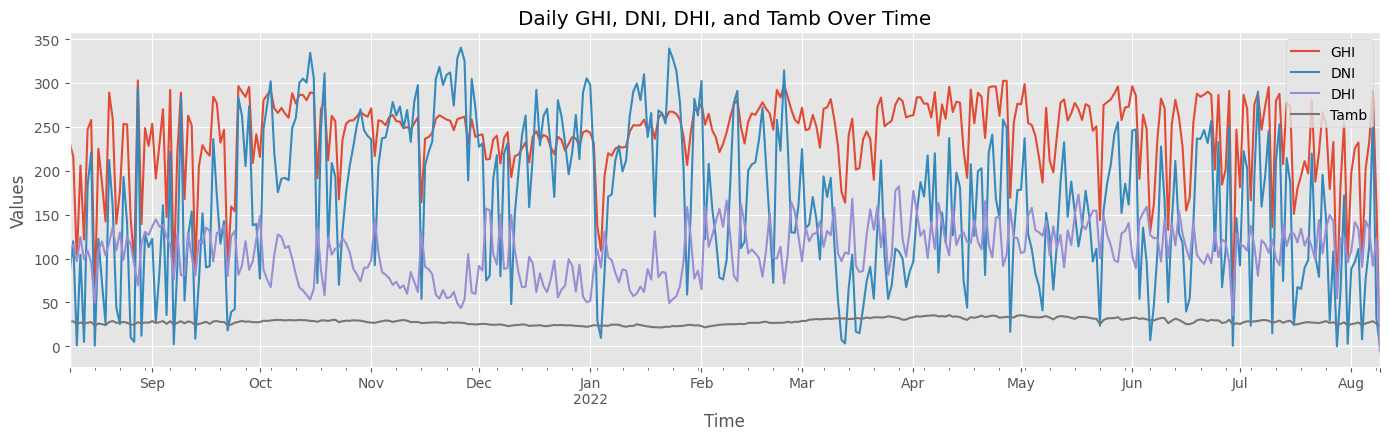

In [24]:
# Set 'Timestamp' as the index for easier time series plotting
df.set_index('Timestamp', inplace=True)

# Resample the data by day or month to observe patterns (optional: you can resample by hour as well)
df_daily = df.resample('D').mean()
df_monthly = df.resample('M').mean()

# Plotting GHI, DNI, DHI, and Tamb over time (using daily resampled data)
plt.figure(figsize=(14, 8))

# Line plot for GHI, DNI, DHI, and Tamb
plt.subplot(2, 1, 1)
df_daily[['GHI', 'DNI', 'DHI', 'Tamb']].plot(ax=plt.gca(), linewidth=1.5)
plt.title('Daily GHI, DNI, DHI, and Tamb Over Time')
plt.ylabel('Values')
plt.xlabel('Time')
plt.grid(True)

plt.tight_layout()
plt.show()

In the next line of code we are going to evaluate the impact of cleaning on the two sensors(ModA and ModB) by using the cleaning column.

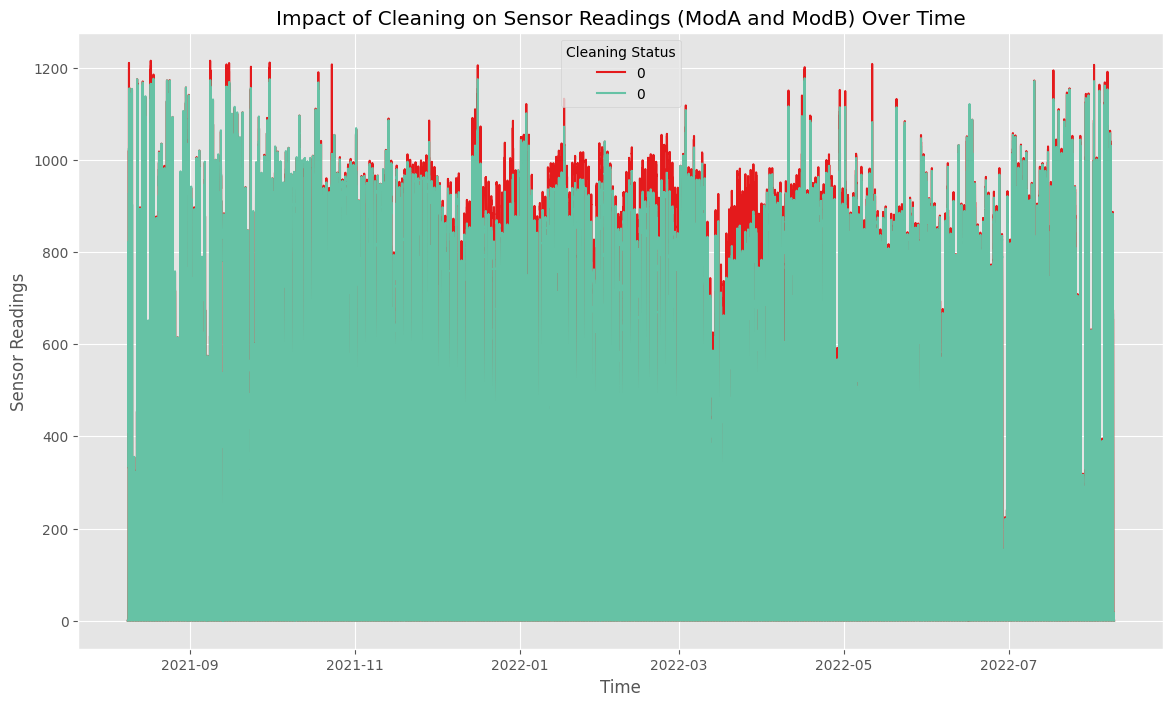

In [26]:
# Check if 'Cleaning' column exists
if 'Cleaning' not in df.columns:
    raise KeyError("The 'Cleaning' column is not present in the DataFrame.")

# Check if 'Timestamp' column is set as index; if not, set it
if df.index.name != 'Timestamp':
    df.set_index('Timestamp', inplace=True)

# Define the figure size
plt.figure(figsize=(14, 8))

# Plot ModA and ModB sensor readings over time, colored by the 'Cleaning' column
sns.lineplot(data=df, x=df.index, y='ModA', hue='Cleaning', palette='Set1', linewidth=1.5)
sns.lineplot(data=df, x=df.index, y='ModB', hue='Cleaning', palette='Set2', linewidth=1.5)

# Add titles and labels
plt.title('Impact of Cleaning on Sensor Readings (ModA and ModB) Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor Readings')
plt.legend(title='Cleaning Status')
plt.grid(True)

# Show the plot
plt.show()


### Correlational analysis

The next line of code conducts a correlational analysis by using heatmaps and pairplots in order to visualize the correaltion between key metrics in the solar radiation side(GHI, DNI , DHI) and temprature side(TModA and TModB).
It also further investigates the relationship between wind conditions(WS, WSgust, WD) and solar irradiance using scatter matrices.

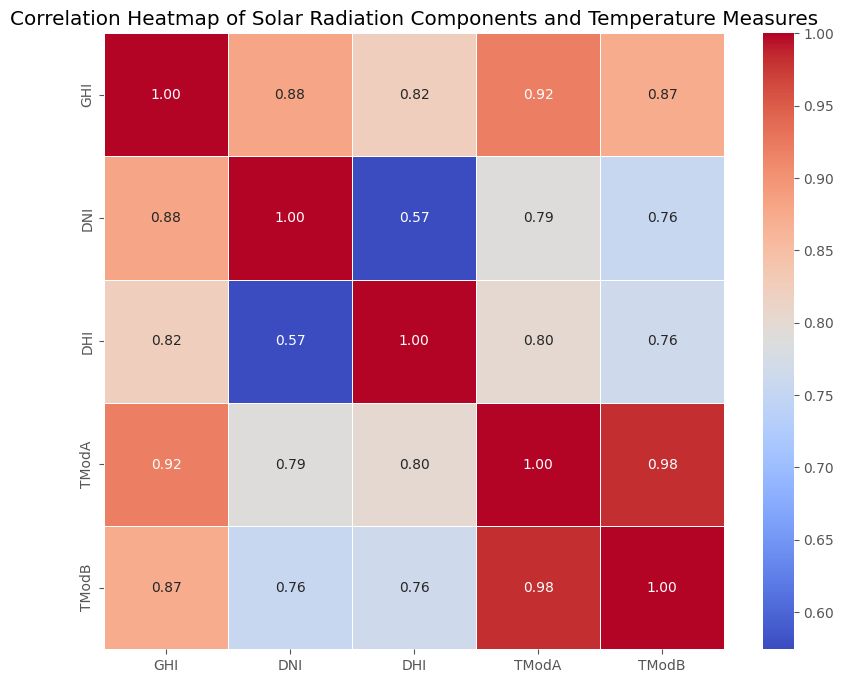

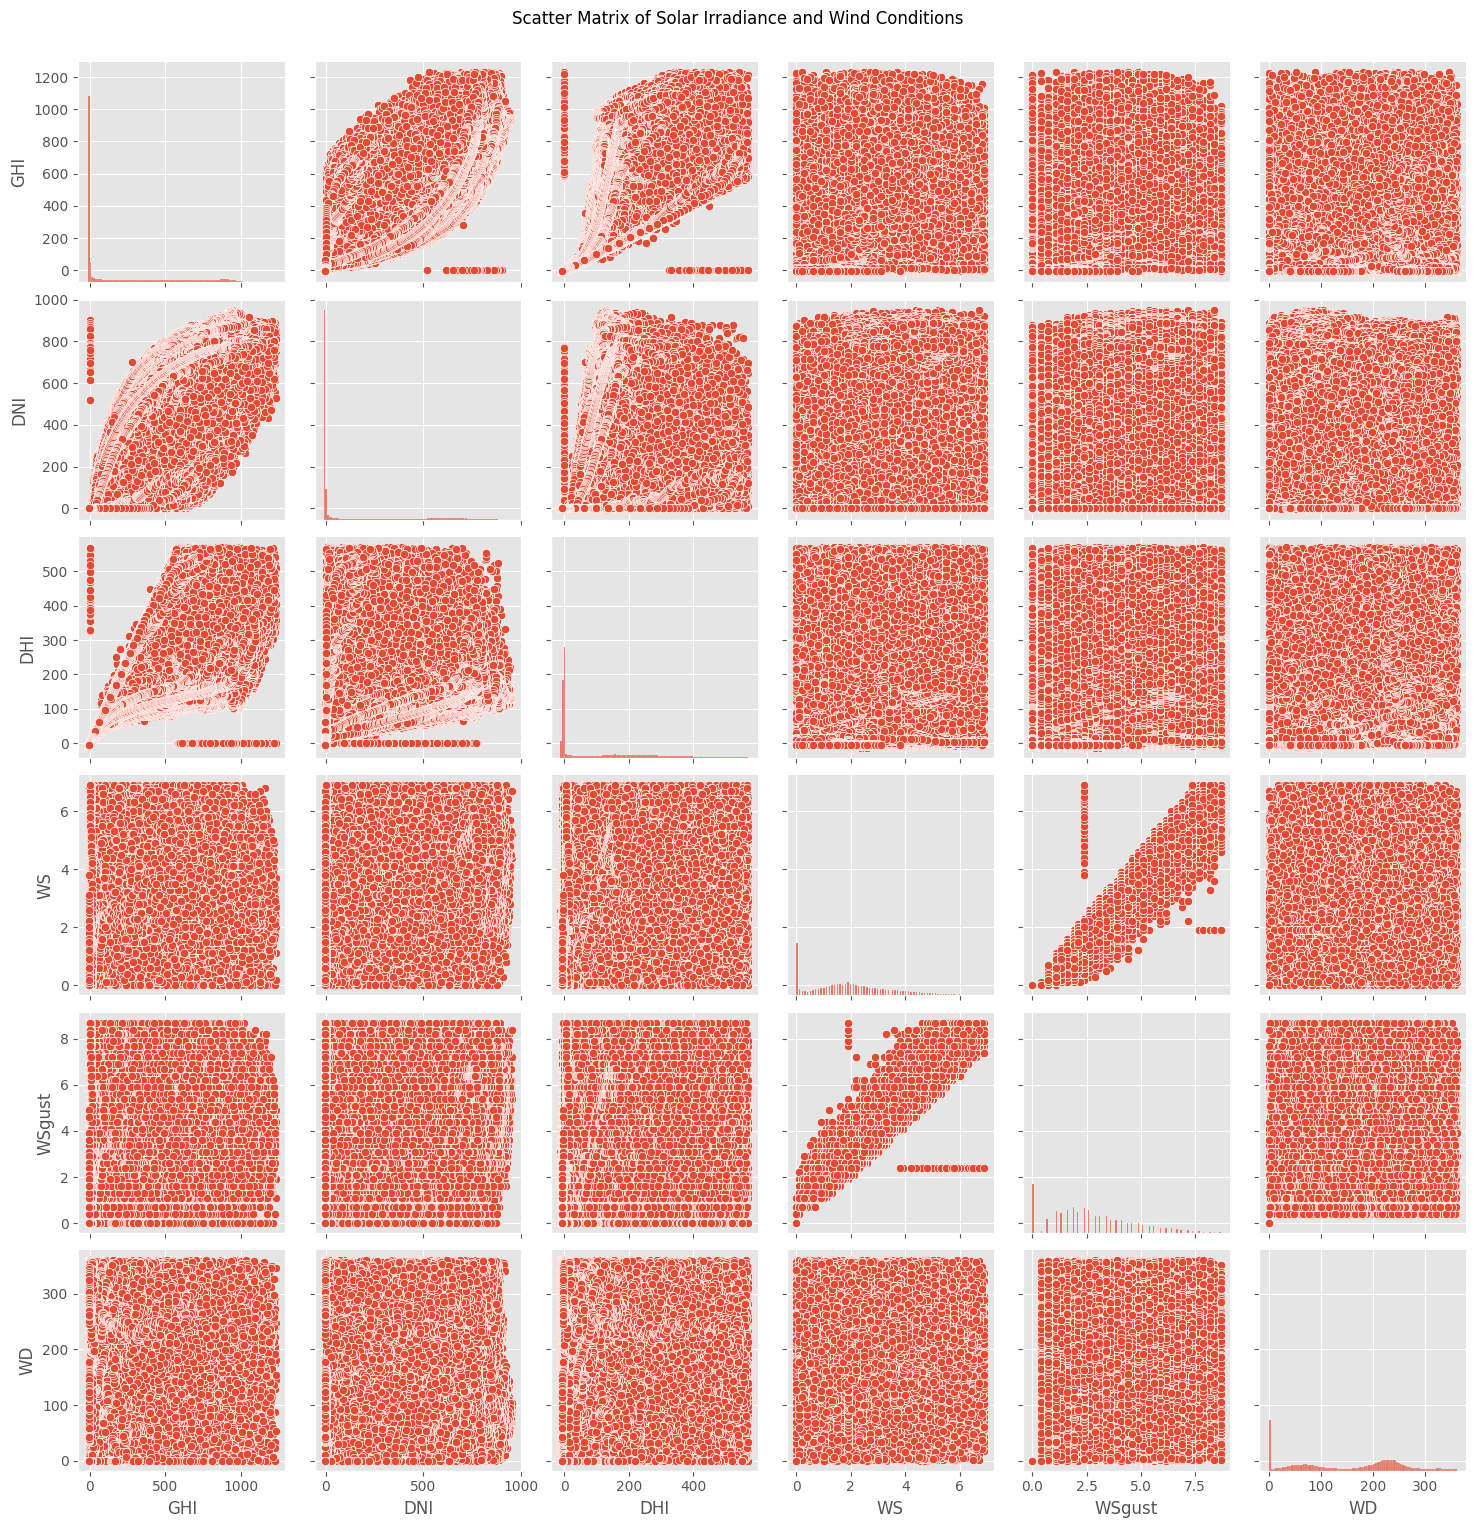

In [27]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Correlation Analysis
# Select relevant columns for correlation analysis
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_data = df[corr_columns]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Solar Radiation Components and Temperature Measures')
plt.show()

# Scatter Matrix Analysis
# Select columns for scatter matrix analysis
scatter_columns = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']
scatter_data = df[scatter_columns]

# Plot scatter matrix (pairplot) to investigate relationships
sns.pairplot(scatter_data)
plt.suptitle('Scatter Matrix of Solar Irradiance and Wind Conditions', y=1.02)
plt.show()


### Wind analysis

The following code investigates the trends and significant wind event by showcasing the distribution of wind speed, direction, and variability of wind direction. It utilizes olar plots to show the trends.

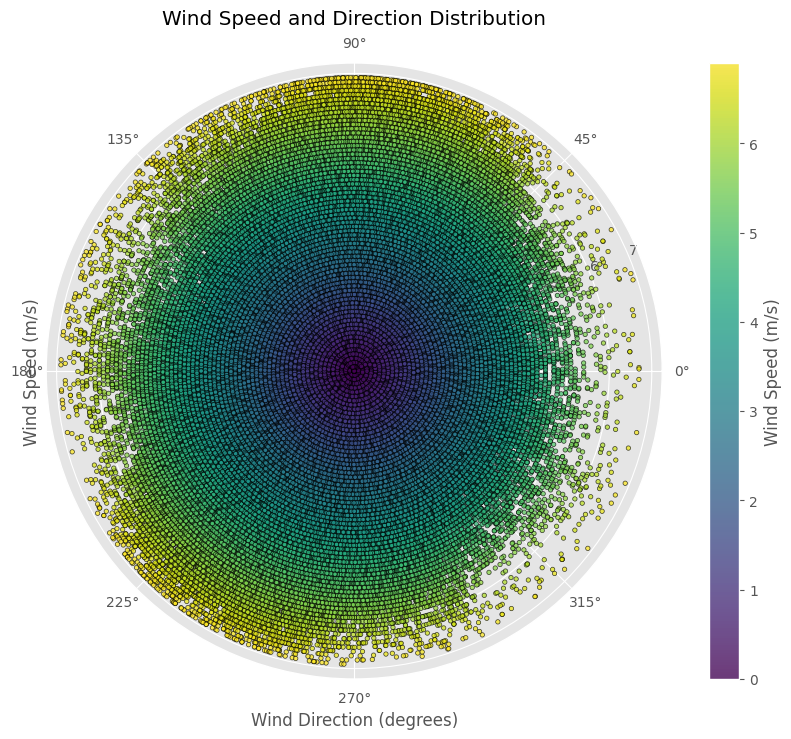

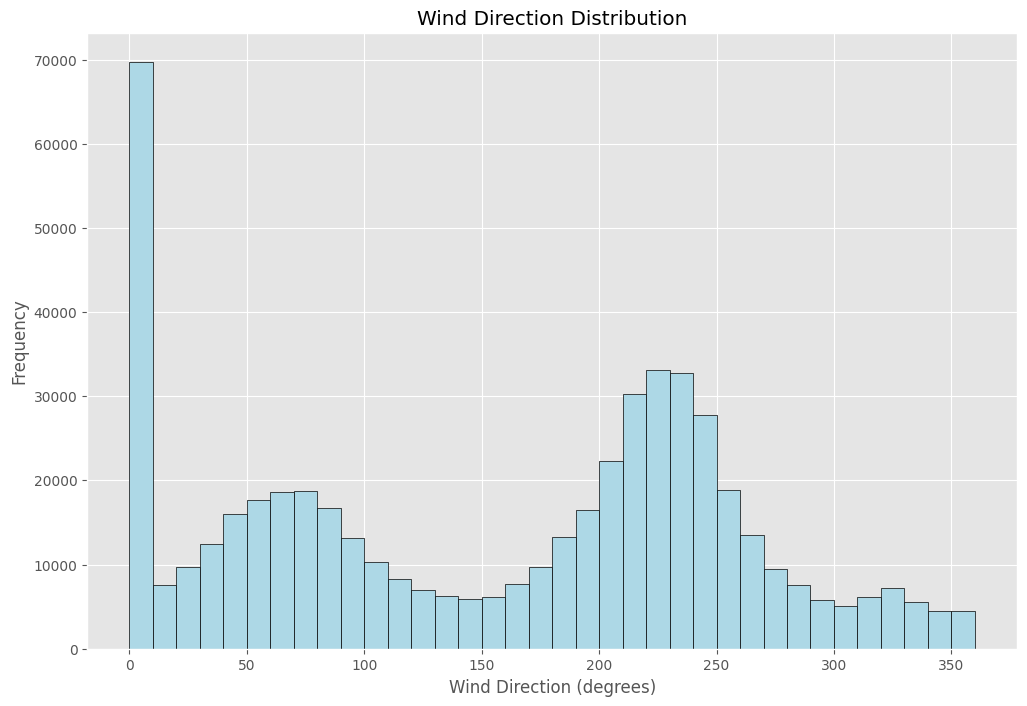

In [28]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['WS', 'WD']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Convert wind direction to radians for polar plotting
df['WD_rad'] = np.deg2rad(df['WD'])

# Plotting Wind Speed vs. Wind Direction (Polar Plot)
plt.figure(figsize=(12, 8))

# Create polar plot for wind speed distribution
ax = plt.subplot(1, 1, 1, projection='polar')
c = ax.scatter(df['WD_rad'], df['WS'], c=df['WS'], cmap='viridis', s=10, alpha=0.75, edgecolors='k', linewidth=0.5)

# Add color bar
plt.colorbar(c, ax=ax, label='Wind Speed (m/s)')

# Customize plot
ax.set_title('Wind Speed and Direction Distribution', va='bottom')
ax.set_xlabel('Wind Direction (degrees)')
ax.set_ylabel('Wind Speed (m/s)')

plt.show()

# Plotting Wind Direction Variability
plt.figure(figsize=(12, 8))

# Create a histogram for wind direction to analyze variability
plt.hist(df['WD'], bins=36, edgecolor='black', color='lightblue')
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()


### Temprature analysis

Below an analysis of how relative humidity(RH) influences temprature readings and solar radiation is conducted. It is conducted by the use of scatter plots and heatmaps.

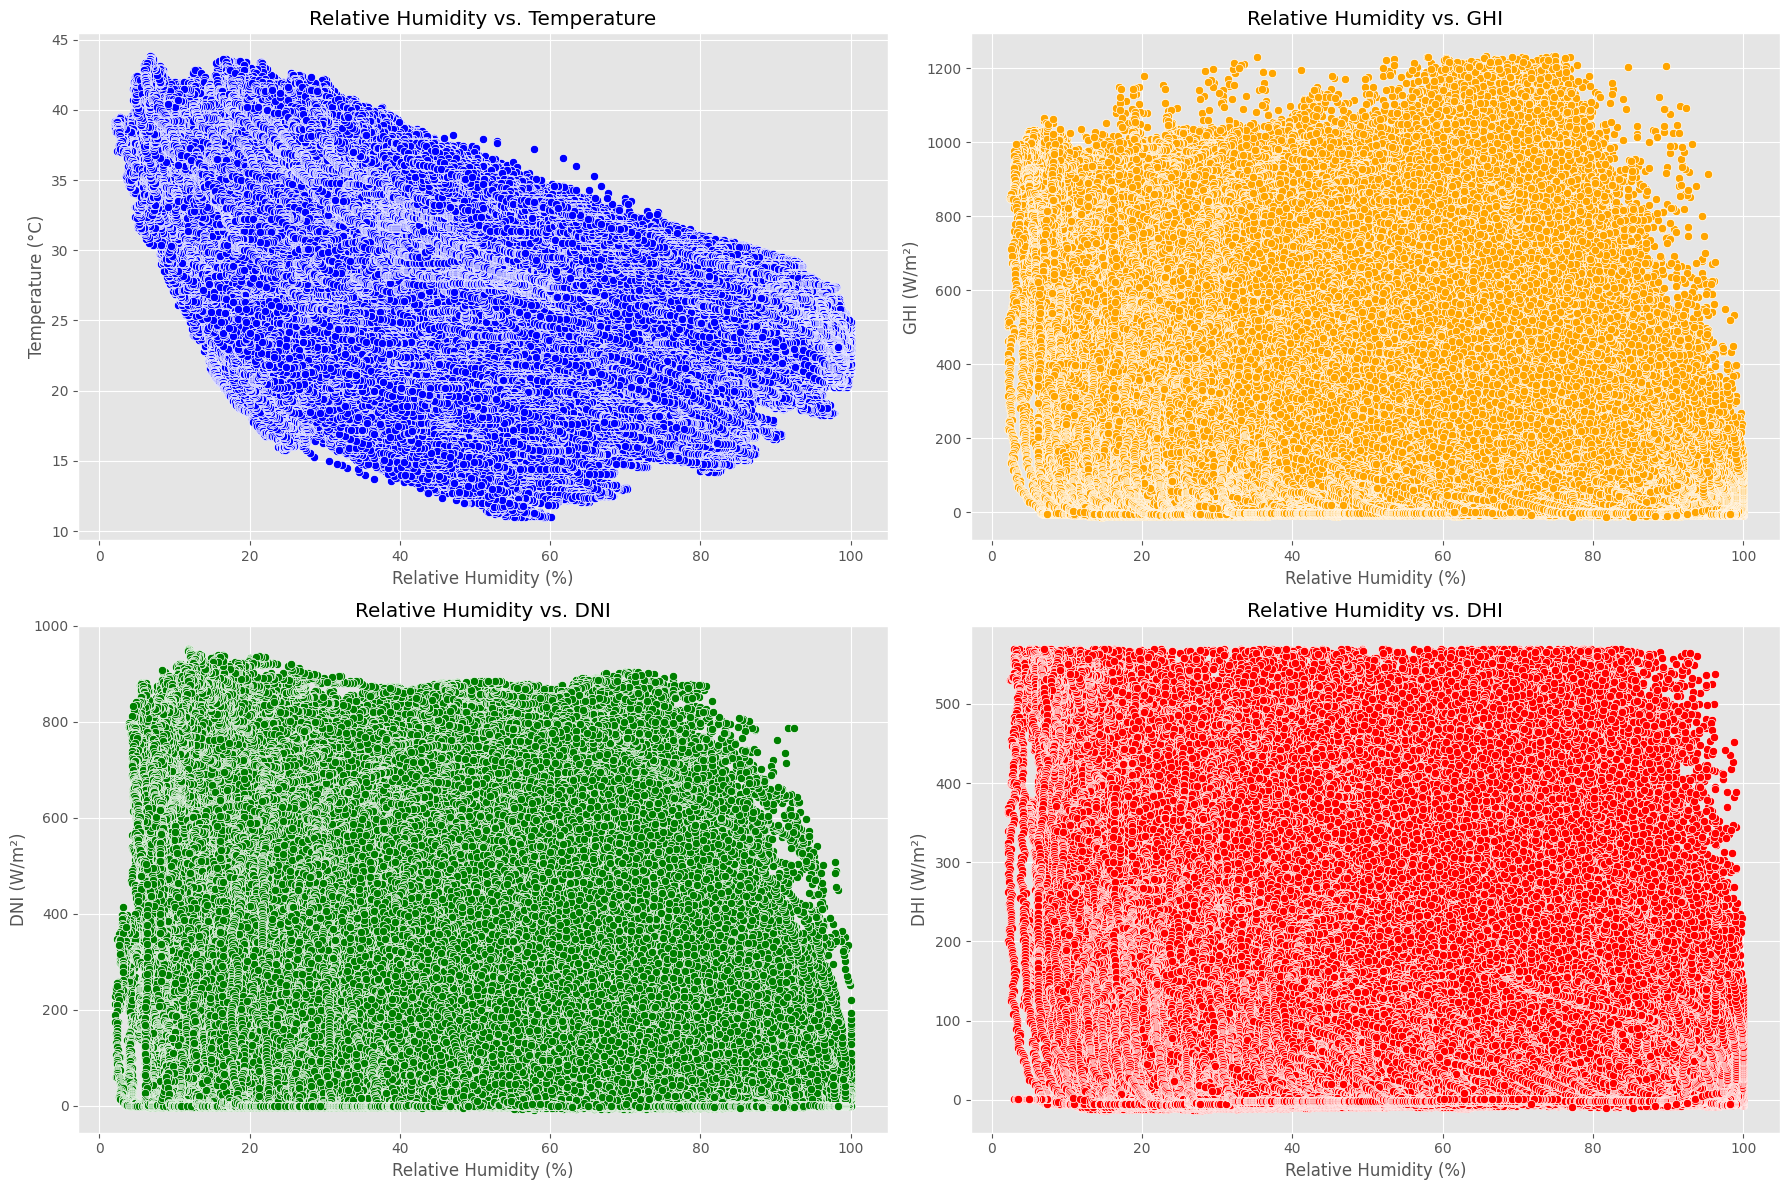

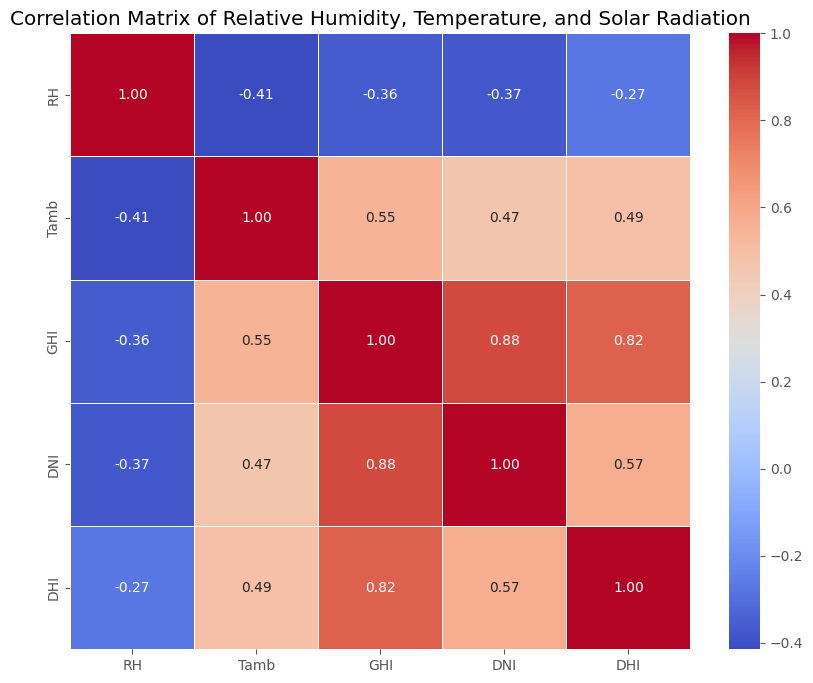

In [29]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Set up the plotting area
plt.figure(figsize=(18, 12))

# Scatter plot for RH vs. Temperature (Tamb)
plt.subplot(2, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df, color='blue')
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Scatter plot for RH vs. GHI (Global Horizontal Irradiance)
plt.subplot(2, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df, color='orange')
plt.title('Relative Humidity vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

# Scatter plot for RH vs. DNI (Direct Normal Irradiance)
plt.subplot(2, 2, 3)
sns.scatterplot(x='RH', y='DNI', data=df, color='green')
plt.title('Relative Humidity vs. DNI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DNI (W/m²)')
plt.grid(True)

# Scatter plot for RH vs. DHI (Diffuse Horizontal Irradiance)
plt.subplot(2, 2, 4)
sns.scatterplot(x='RH', y='DHI', data=df, color='red')
plt.title('Relative Humidity vs. DHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DHI (W/m²)')
plt.grid(True)

# Show all plots
plt.tight_layout()
plt.show()

# Correlation matrix for RH, Temperature, and Solar Radiation
correlation_cols = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']
correlation_matrix = df[correlation_cols].corr()

# Plot the heatmap for correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Relative Humidity, Temperature, and Solar Radiation')
plt.show()


### Histograms


The code below visualizes the frequency distribution of key metrics like GHI, DNi, DHI, WS and tempratures by the use of histograms.

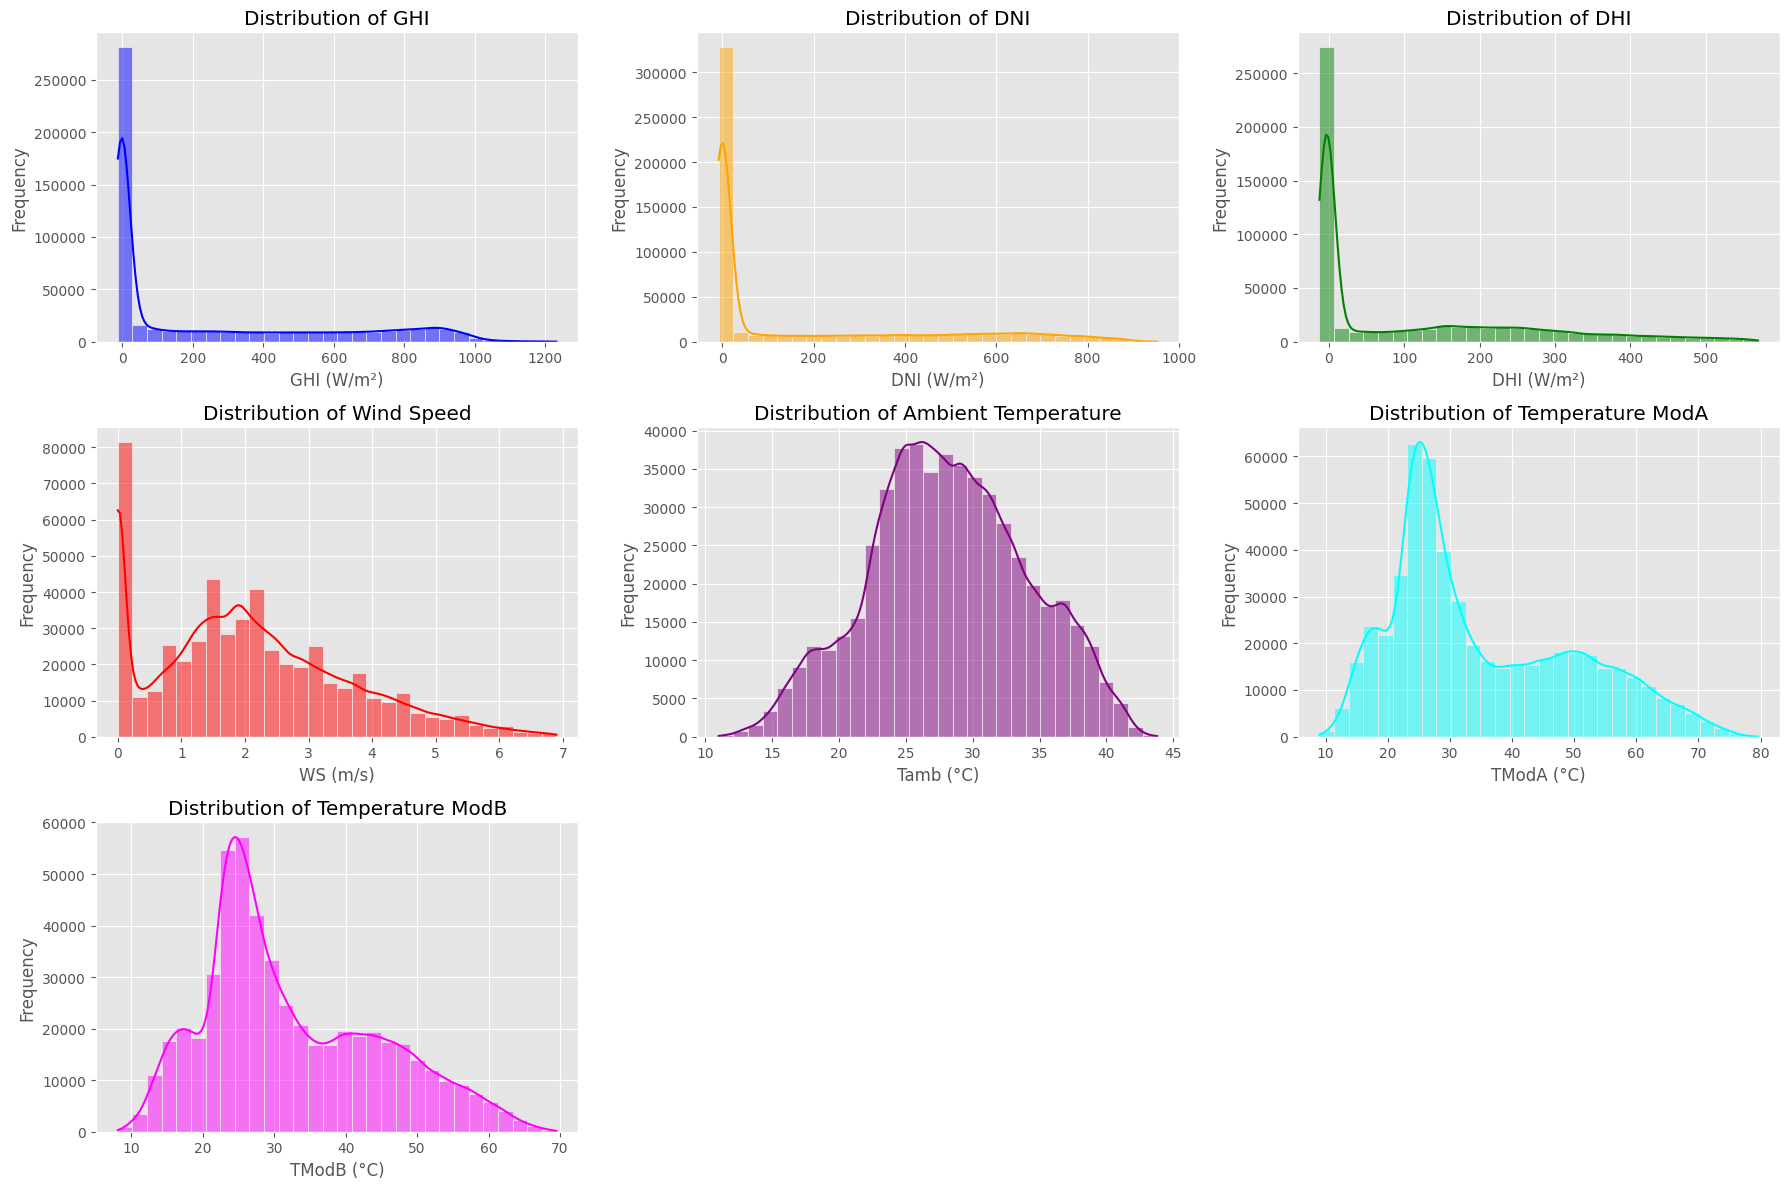

In [30]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Set up the plotting area
plt.figure(figsize=(18, 12))

# Histogram for GHI (Global Horizontal Irradiance)
plt.subplot(3, 3, 1)
sns.histplot(df['GHI'], bins=30, kde=True, color='blue')
plt.title('Distribution of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for DNI (Direct Normal Irradiance)
plt.subplot(3, 3, 2)
sns.histplot(df['DNI'], bins=30, kde=True, color='orange')
plt.title('Distribution of DNI')
plt.xlabel('DNI (W/m²)')
plt.ylabel('Frequency')

# Histogram for DHI (Diffuse Horizontal Irradiance)
plt.subplot(3, 3, 3)
sns.histplot(df['DHI'], bins=30, kde=True, color='green')
plt.title('Distribution of DHI')
plt.xlabel('DHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for WS (Wind Speed)
plt.subplot(3, 3, 4)
sns.histplot(df['WS'], bins=30, kde=True, color='red')
plt.title('Distribution of Wind Speed')
plt.xlabel('WS (m/s)')
plt.ylabel('Frequency')

# Histogram for Tamb (Ambient Temperature)
plt.subplot(3, 3, 5)
sns.histplot(df['Tamb'], bins=30, kde=True, color='purple')
plt.title('Distribution of Ambient Temperature')
plt.xlabel('Tamb (°C)')
plt.ylabel('Frequency')

# Histogram for TModA (Temperature Sensor A)
plt.subplot(3, 3, 6)
sns.histplot(df['TModA'], bins=30, kde=True, color='cyan')
plt.title('Distribution of Temperature ModA')
plt.xlabel('TModA (°C)')
plt.ylabel('Frequency')

# Histogram for TModB (Temperature Sensor B)
plt.subplot(3, 3, 7)
sns.histplot(df['TModB'], bins=30, kde=True, color='magenta')
plt.title('Distribution of Temperature ModB')
plt.xlabel('TModB (°C)')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Bubble charts

In the code below, an attempt is made to show the complex relationships between variables, such as GHI vs Tamb vs WS, where the Bubble sizes also represent an additional variable liek RH or Baro metric pressure

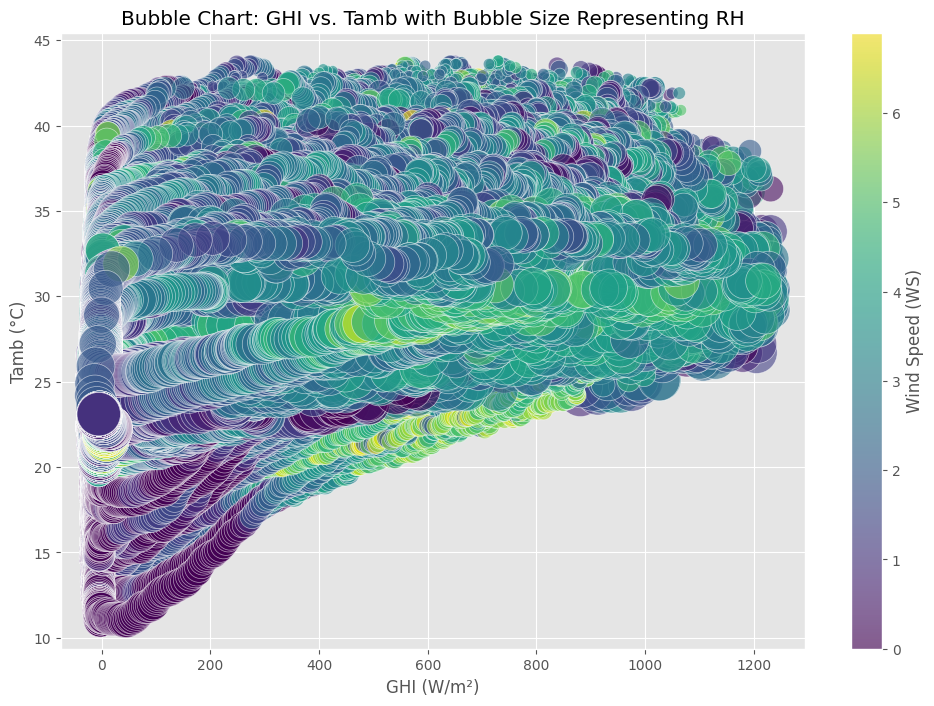

In [31]:
# Ensure you have the relevant columns in the DataFrame
required_columns = ['GHI', 'Tamb', 'WS', 'RH']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in the DataFrame: {', '.join(missing_cols)}")

# Plot Bubble Chart
plt.figure(figsize=(12, 8))

# Scatter plot for GHI vs. Tamb with bubble size representing RH
plt.scatter(
    x=df['GHI'],              # X-axis: GHI (Global Horizontal Irradiance)
    y=df['Tamb'],             # Y-axis: Tamb (Ambient Temperature)
    s=df['RH'] * 10,          # Bubble size: RH (Relative Humidity) scaled for visibility
    c=df['WS'],               # Color by WS (Wind Speed)
    cmap='viridis',           # Colormap for Wind Speed
    alpha=0.6,                # Transparency level of bubbles
    edgecolors='w',           # White edge color for bubbles
    linewidth=0.5             # Edge line width
)

# Add color bar to indicate Wind Speed
plt.colorbar(label='Wind Speed (WS)')

# Add titles and labels
plt.title('Bubble Chart: GHI vs. Tamb with Bubble Size Representing RH')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')

# Show plot
plt.grid(True)
plt.show()
